In [1]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

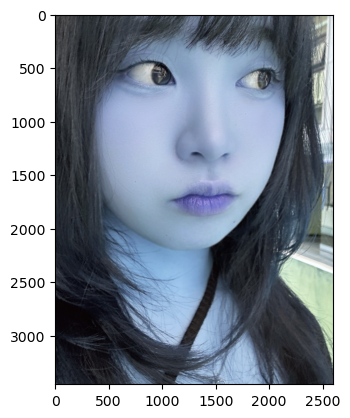

In [3]:
my_image_path ='C:/selfie.png' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

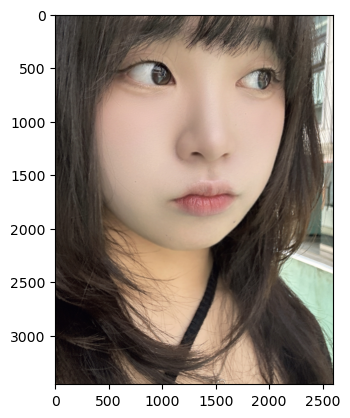

In [4]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [5]:
# detector를 선언합니다

detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) # (image, num of image pyramid)

rectangles[[(398, 178) (2386, 2165)]]


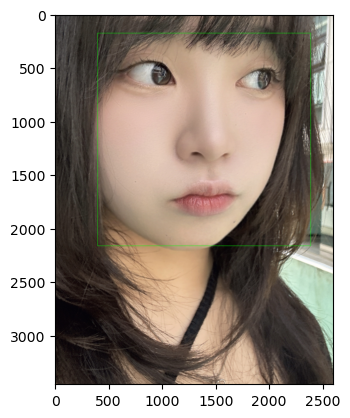

In [6]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다

print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    
scale_percent = 20  # 이미지 크기를 20%로 축소
width = int(img_show.shape[1] * scale_percent / 100)
height = int(img_show.shape[0] * scale_percent / 100)
dim = (width, height)

# 이미지 크기 조정
img_resized = cv2.resize(img_show, dim, interpolation=cv2.INTER_AREA) 

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [8]:
import bz2
import shutil

# 압축 해제 후 저장할 파일 경로
decompressed_file = 'shape_predictor_68_face_landmarks.dat' # 저장한 landmark 모델의 주소를 decompressed_file 변수에 저장

# 해제된 파일을 dlib 모델로 불러오기
import dlib
landmark_predictor = dlib.shape_predictor(decompressed_file)

# 개인 주피터 환경에서 실행했기 때문에 노드에서 불러오는 코드와 다름
# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
# landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
# dlib.rectangle: 내부를 예측하는 박스
 # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [9]:
list_landmarks = []
# 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points) # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
# 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
# 각 원소는 68개의 랜드마크 위치가 나열된 list 
# list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


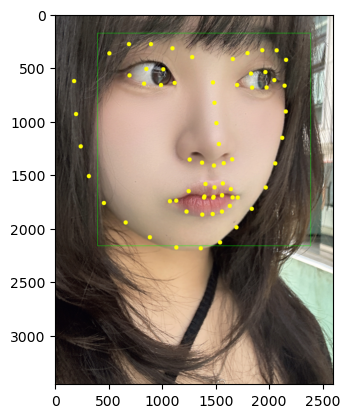

In [17]:
for landmark in list_landmarks: # list_landmarks의 원소가 1개이므로 반복문은 한번만 실행됨
    for point in landmark:
        cv2.circle(img_show, point, 20, (0, 255, 255), -1) # 점크기를 2로 하니 랜드마크가 잘 안 보여 20으로 변경
        # cv2.circle: OpenCV의 원을 그리는 함수
        # img_show 이미지 위 각각의 point에
        # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
        # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # RGB 이미지로 전환
plt.imshow(img_show_rgb) # 이미지를 준비
plt.show() # 이미지를 출력

In [18]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    # 코 끝 좌표 출력 및 계산
    print(landmark[30])
    x = landmark[30][0]  # 코 끝의 x 좌표
    y = landmark[30][1]  # 코 끝의 y 좌표
    w = int((landmark[35][0] - landmark[31][0]) * 1.5) * 3 # 콧볼 너비를 기준으로 스티커 너비 설정
    h = int((landmark[33][1] - landmark[30][1]) * 2) * 2  # 코 높이 기준으로 스티커 높이 설정
    print(f'(x, y): ({x}, {y})')
    print(f'(w, h): ({w}, {h})')

(1529, 1214)
(x, y): (1529, 1214)
(w, h): (1785, 804)


In [35]:
# 스티커 이미지 경로
sticker_path = 'C:/cat-whiskers.png'  # 고양이 코 이미지의 경로
img_sticker = cv2.imread(sticker_path)  # 스티커 이미지를 불러옴
img_sticker_resized = cv2.resize(img_sticker, (w, h), interpolation=cv2.INTER_AREA)  # 스티커 이미지 크기 조정
print(img_sticker_resized.shape)  # 스티커 차원 확인

(804, 1785, 4)


In [39]:
# 스티커를 코 끝 중심으로 맞춤
refined_x = x - w // 2
refined_y = y - h // 2

# 스티커가 이미지 범위를 넘어가지 않도록 처리
refined_x = max(0, refined_x)
refined_y = max(0, refined_y)

sticker_h, sticker_w = img_sticker_resized.shape[:2]

# 스티커가 이미지 밖에서 시작하지 않도록 조정
if refined_x + sticker_w > img_show.shape[1]:
    sticker_w = img_show.shape[1] - refined_x
if refined_y + sticker_h > img_show.shape[0]:
    sticker_h = img_show.shape[0] - refined_y

In [42]:
# 스티커가 적용될 원본 이미지 영역 추출
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# np.where를 사용해 흰색이 아닌 스티커 영역을 원본에 덮어씌움
img_combined = np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

# 가중치를 적용하여 스티커와 원본 이미지를 자연스럽게 합성 (알파 채널 없는 경우)
alpha = 0.7  # 원본 이미지의 가중치
beta = 0.3   # 스티커 이미지의 가중치
blended = cv2.addWeighted(sticker_area, alpha, img_combined, beta, 0)

# 합성된 이미지를 원본 이미지의 해당 영역에 적용
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = blended

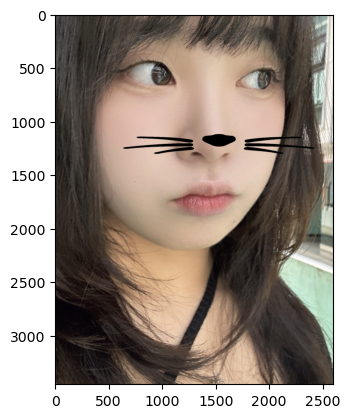

In [43]:
# 결과 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

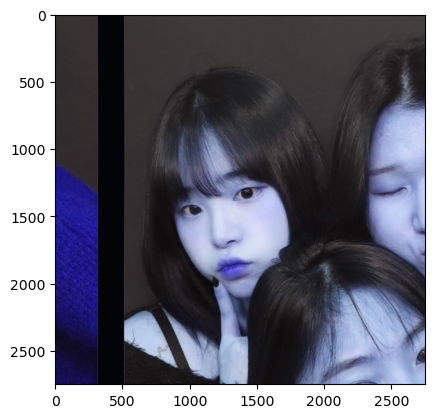

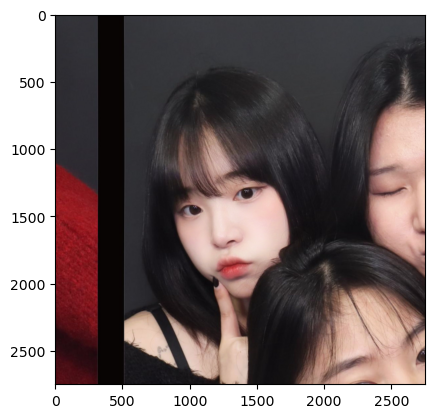

rectangles[]


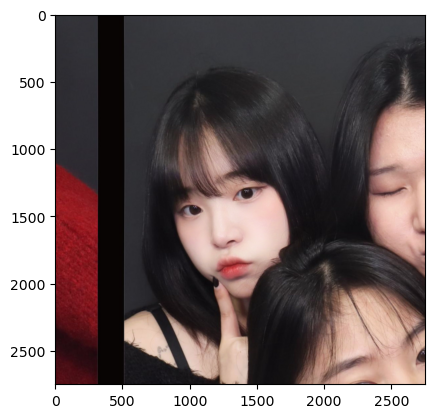

IndexError: list index out of range

In [44]:
# 바운딩 박스, 랜드마크 둘 다 안되는 사진

my_image_path ='C:/No_all.png' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

# detector를 선언합니다

detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다

print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    
scale_percent = 20  # 이미지 크기를 20%로 축소
width = int(img_show.shape[1] * scale_percent / 100)
height = int(img_show.shape[0] * scale_percent / 100)
dim = (width, height)

# 이미지 크기 조정
img_resized = cv2.resize(img_show, dim, interpolation=cv2.INTER_AREA) 

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

import bz2
import shutil

# 압축 해제 후 저장할 파일 경로
decompressed_file = 'shape_predictor_68_face_landmarks.dat' # 저장한 landmark 모델의 주소를 decompressed_file 변수에 저장

# 해제된 파일을 dlib 모델로 불러오기
import dlib
landmark_predictor = dlib.shape_predictor(decompressed_file)

# 개인 주피터 환경에서 실행했기 때문에 노드에서 불러오는 코드와 다름
# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
# landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
# dlib.rectangle: 내부를 예측하는 박스
 # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

list_landmarks = []
# 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points) # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
# 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
# 각 원소는 68개의 랜드마크 위치가 나열된 list 
# list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

for landmark in list_landmarks: # list_landmarks의 원소가 1개이므로 반복문은 한번만 실행됨
    for point in landmark:
        cv2.circle(img_show, point, 20, (0, 255, 255), -1) # 점크기를 2로 하니 랜드마크가 잘 안 보여 20으로 변경
        # cv2.circle: OpenCV의 원을 그리는 함수
        # img_show 이미지 위 각각의 point에
        # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
        # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # RGB 이미지로 전환
plt.imshow(img_show_rgb) # 이미지를 준비
plt.show() # 이미지를 출력

# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    # 코 끝 좌표 출력 및 계산
    print(landmark[30])
    x = landmark[30][0]  # 코 끝의 x 좌표
    y = landmark[30][1]  # 코 끝의 y 좌표
    w = int((landmark[35][0] - landmark[31][0]) * 1.5) * 3 # 콧볼 너비를 기준으로 스티커 너비 설정
    h = int((landmark[33][1] - landmark[30][1]) * 2) * 2  # 코 높이 기준으로 스티커 높이 설정
    print(f'(x, y): ({x}, {y})')
    print(f'(w, h): ({w}, {h})')

# 스티커 이미지 경로
sticker_path = 'C:/cat-whiskers.png'  # 고양이 코 이미지의 경로
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)  # 스티커 이미지를 불러옴
img_sticker_resized = cv2.resize(img_sticker, (w, h), interpolation=cv2.INTER_AREA)  # 스티커 이미지 크기 조정
print(img_sticker_resized.shape)  # 스티커 차원 확인

# 스티커를 코 끝 중심으로 맞춤
refined_x = x - w // 2
refined_y = y - h // 2

# 스티커가 이미지 범위를 넘어가지 않도록 처리
refined_x = max(0, refined_x)
refined_y = max(0, refined_y)

sticker_h, sticker_w = img_sticker_resized.shape[:2]

# 스티커가 이미지 밖에서 시작하지 않도록 조정
if refined_x + sticker_w > img_show.shape[1]:
    sticker_w = img_show.shape[1] - refined_x
if refined_y + sticker_h > img_show.shape[0]:
    sticker_h = img_show.shape[0] - refined_y

if img_sticker_resized.shape[2] == 4:
    # 스티커 이미지에 알파 채널이 있는 경우
    alpha_s = img_sticker_resized[:, :, 3] / 255.0  # 스티커 알파 채널 (0~255 범위를 0~1로 변환)
    alpha_l = 1.0 - alpha_s  # 원본 이미지에서 사용할 알파 채널

    # 스티커가 적용될 영역을 설정하고 BGR 채널에 대해 합성 수행
    for c in range(0, 3):  # BGR 채널에 대해 반복 (0: Blue, 1: Green, 2: Red)
        img_bgr[refined_y:refined_y + sticker_h, refined_x:refined_x + sticker_w, c] = \
            (alpha_s * img_sticker_resized[:sticker_h, :sticker_w, c] + \
             alpha_l * img_bgr[refined_y:refined_y + sticker_h, refined_x:refined_x + sticker_w, c])
else:
    # 스티커 이미지에 알파 채널이 없는 경우 addWeighted 사용
    # 스티커가 적용될 원본 이미지의 영역을 추출
    roi = img_bgr[refined_y:refined_y + sticker_h, refined_x:refined_x + sticker_w]
    
    # 스티커 이미지 크기를 원본 이미지 영역 크기와 동일하게 맞춤
    img_sticker_cropped = img_sticker_resized[:sticker_h, :sticker_w]

    # 가중치를 사용하여 두 이미지를 합성
    alpha = 0.7 # 원본 이미지의 가중치
    beta = 0.3   # 스티커 이미지의 가중치
    img_combined = cv2.addWeighted(roi, alpha, img_sticker_cropped, beta, 0) # addWeighted를 추가하여 좀 더 자연스럽게 만듦

    # 합성된 결과를 원본 이미지의 해당 영역에 적용
    img_bgr[refined_y:refined_y + sticker_h, refined_x:refined_x + sticker_w] = img_combined

# 결과 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 랜드마크가 출력이 안되는 이유는, 턱이 손과 다른 사람의 머리에 가려져 있어 인식이 되지 않는 것이라 생각한다.

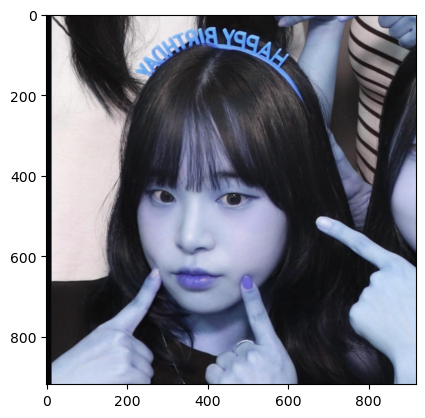

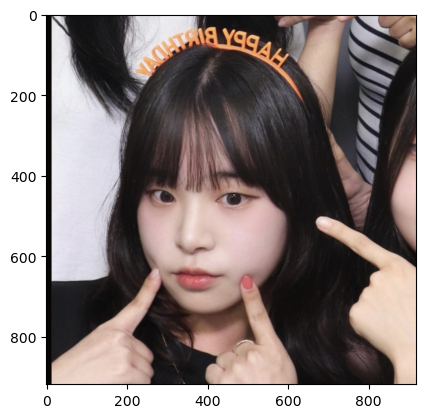

rectangles[[(204, 333) (589, 718)]]


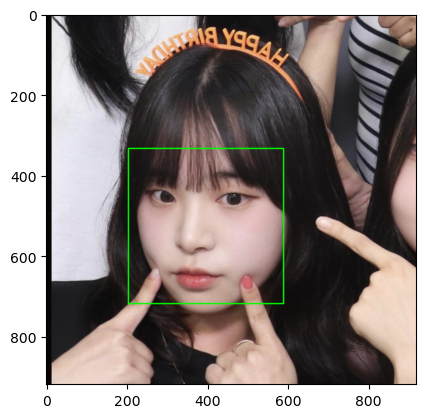

68


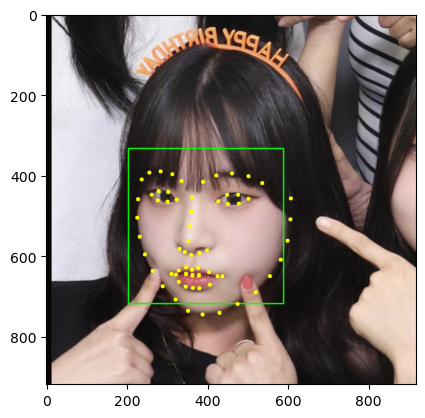

(353, 563)
(x, y): (353, 563)
(w, h): (306, 136)
(136, 306, 4)


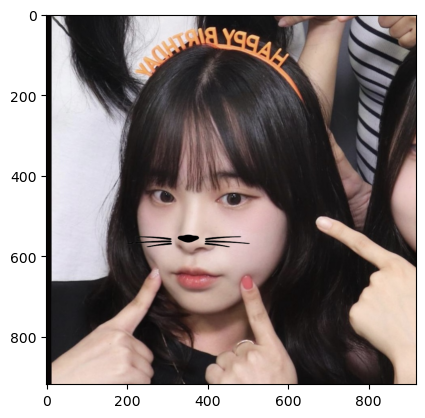

In [48]:
# 얼굴 각도에 따른 정확도를 보기 위한 다른 사진

my_image_path ='C:/selfie2.png' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

# detector를 선언합니다

detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다

print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    
scale_percent = 20  # 이미지 크기를 20%로 축소
width = int(img_show.shape[1] * scale_percent / 100)
height = int(img_show.shape[0] * scale_percent / 100)
dim = (width, height)

# 이미지 크기 조정
img_resized = cv2.resize(img_show, dim, interpolation=cv2.INTER_AREA) 

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

import bz2
import shutil

# 압축 해제 후 저장할 파일 경로
decompressed_file = 'shape_predictor_68_face_landmarks.dat' # 저장한 landmark 모델의 주소를 decompressed_file 변수에 저장

# 해제된 파일을 dlib 모델로 불러오기
import dlib
landmark_predictor = dlib.shape_predictor(decompressed_file)

# 개인 주피터 환경에서 실행했기 때문에 노드에서 불러오는 코드와 다름
# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
# landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
# dlib.rectangle: 내부를 예측하는 박스
 # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

list_landmarks = []
# 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points) # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
# 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
# 각 원소는 68개의 랜드마크 위치가 나열된 list 
# list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

for landmark in list_landmarks: # list_landmarks의 원소가 1개이므로 반복문은 한번만 실행됨
    for point in landmark:
        cv2.circle(img_show, point, 5, (0, 255, 255), -1) # 점크기를 2로 하니 랜드마크가 잘 안 보여 20으로 변경
        # cv2.circle: OpenCV의 원을 그리는 함수
        # img_show 이미지 위 각각의 point에
        # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
        # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # RGB 이미지로 전환
plt.imshow(img_show_rgb) # 이미지를 준비
plt.show() # 이미지를 출력

# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    # 코 끝 좌표 출력 및 계산
    print(landmark[30])
    x = landmark[30][0]  # 코 끝의 x 좌표
    y = landmark[30][1]  # 코 끝의 y 좌표
    w = int((landmark[35][0] - landmark[31][0]) * 1.5) * 3 # 콧볼 너비를 기준으로 스티커 너비 설정
    h = int((landmark[33][1] - landmark[30][1]) * 2) * 2  # 코 높이 기준으로 스티커 높이 설정
    print(f'(x, y): ({x}, {y})')
    print(f'(w, h): ({w}, {h})')

# 스티커 이미지 경로
sticker_path = 'C:/cat-whiskers.png'  # 고양이 코 이미지의 경로
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)  # 스티커 이미지를 불러옴
img_sticker_resized = cv2.resize(img_sticker, (w, h), interpolation=cv2.INTER_AREA)  # 스티커 이미지 크기 조정
print(img_sticker_resized.shape)  # 스티커 차원 확인

# 스티커를 코 끝 중심으로 맞춤
refined_x = x - w // 2
refined_y = y - h // 2

# 스티커가 이미지 범위를 넘어가지 않도록 처리
refined_x = max(0, refined_x)
refined_y = max(0, refined_y)

sticker_h, sticker_w = img_sticker_resized.shape[:2]

# 스티커가 이미지 밖에서 시작하지 않도록 조정
if refined_x + sticker_w > img_show.shape[1]:
    sticker_w = img_show.shape[1] - refined_x
if refined_y + sticker_h > img_show.shape[0]:
    sticker_h = img_show.shape[0] - refined_y

if img_sticker_resized.shape[2] == 4:
    # 스티커 이미지에 알파 채널이 있는 경우
    alpha_s = img_sticker_resized[:, :, 3] / 255.0  # 스티커 알파 채널 (0~255 범위를 0~1로 변환)
    alpha_l = 1.0 - alpha_s  # 원본 이미지에서 사용할 알파 채널

    # 스티커가 적용될 영역을 설정하고 BGR 채널에 대해 합성 수행
    for c in range(0, 3):  # BGR 채널에 대해 반복 (0: Blue, 1: Green, 2: Red)
        img_bgr[refined_y:refined_y + sticker_h, refined_x:refined_x + sticker_w, c] = \
            (alpha_s * img_sticker_resized[:sticker_h, :sticker_w, c] + \
             alpha_l * img_bgr[refined_y:refined_y + sticker_h, refined_x:refined_x + sticker_w, c])
else:
    # 스티커 이미지에 알파 채널이 없는 경우 addWeighted 사용
    # 스티커가 적용될 원본 이미지의 영역을 추출
    roi = img_bgr[refined_y:refined_y + sticker_h, refined_x:refined_x + sticker_w]
    
    # 스티커 이미지 크기를 원본 이미지 영역 크기와 동일하게 맞춤
    img_sticker_cropped = img_sticker_resized[:sticker_h, :sticker_w]

    # 가중치를 사용하여 두 이미지를 합성
    alpha = 0.7 # 원본 이미지의 가중치
    beta = 0.3   # 스티커 이미지의 가중치
    img_combined = cv2.addWeighted(roi, alpha, img_sticker_cropped, beta, 0) # addWeighted를 추가하여 좀 더 자연스럽게 만듦

    # 합성된 결과를 원본 이미지의 해당 영역에 적용
    img_bgr[refined_y:refined_y + sticker_h, refined_x:refined_x + sticker_w] = img_combined

# 결과 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

In [49]:
# 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

# 1. 얼굴 각도에 따라 스티커가 어떻게 변해야할까요? 
# -> 얼굴이 기울어져 찍히면 스티커도 기울어지고, 얼굴이 좌우 반전이 된다면 스티커도 좌우 반전되어야 한다

# 2. 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
# -> 멀리서 촬영하면 얼굴 인식이 잘되지 않고, 옆으로 누워서 촬영하면 얼굴이 많이 기울어지거나 일부만 보이게 되기 때문이다.

# 3. 실행 속도가 중요할까요?
# -> 매우 중요하다. 기존의 얼굴인식 어플들은 얼굴이 인식되자마자 스티커가 생기는 경우가 많다. 그렇지 않으면 사용자의 불만이 커지게 된다.

# 4. 스티커앱을 만들 때 정확도가 얼마나 중요할까요?
# -> 매우 중요하다. 정확도가 좋지 않으면 사용자의 불만이 커지기 때문이다.

In [ ]:
# 다양한 이미지에 적용하였을 때

# 두 번째 사진의 경우, 얼굴이 많이 기울어져있고, 턱이 가려져 있기 때문에 바운딩 박스와 랜드마크 인식이 되지 않았다.
# 하지만 실습에 사용된 첫번째, 세번째 사진 모두 밝기가 적당하기 때문에, 바운딩 박스 인식은 잘 되었다. (사진상에서 얼굴의 위치를 앎)
# 첫번째, 세번째 사진 모두 촬영거리가 적당하기 때문에, 사진상 얼굴의 위치를 잘 파악하여 바운딩 박스가 만들어졌다.